# Assignment 6.1

Name:  Gangadhar Singh Shiva
Date:  Oct, 12, 2024

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


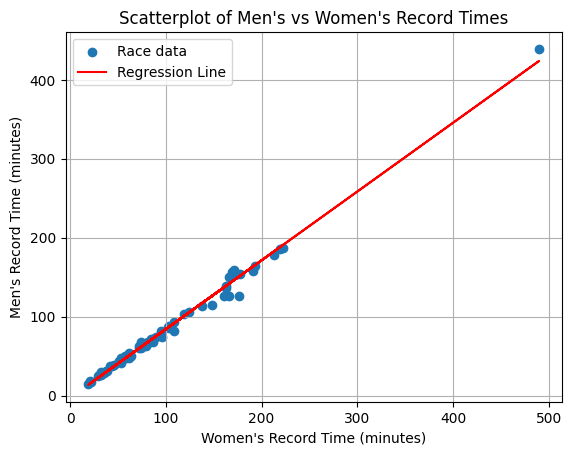

Regression equation: timeM = -2.834 + 0.871 * timeW

 Answer Predicted men's record time for Highland Fling (timeW = 490.05): 423.94 minutes


In [ ]:
#
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


url = "http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat"
df = pd.read_csv(url, sep='\s+')


# Fitting the regression model
model = sm.ols('timeM ~ timeW', data=df).fit()

# Creating the scatterplot with the regression line
plt.scatter(df['timeW'], df['timeM'], label='Race data')
plt.plot(df['timeW'], model.fittedvalues, color='red', label='Regression Line')
plt.xlabel("Women's Record Time (minutes)")
plt.ylabel("Men's Record Time (minutes)")
plt.title("Scatterplot of Men's vs Women's Record Times")
plt.legend()
plt.grid(True)
plt.show()


# Output the regression equation
print(f"Regression equation: timeM = {model.params['Intercept']:.3f} + {model.params['timeW']:.3f} * timeW")


# Predict the men's record time for the Highland Fling
timeW_Highland_Fling = 490.05

predicted_timeM = model.predict(pd.DataFrame({'timeW': [timeW_Highland_Fling]}))

print(f"\n Answer Predicted men's record time for Highland Fling (timeW = {timeW_Highland_Fling}): {predicted_timeM[0]:.2f} minutes")


In [ ]:
# Print the regression equation
print( " model summary \n",model.summary())

 model summary 
                             OLS Regression Results                            
Dep. Variable:                  timeM   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7947.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           1.63e-70
Time:                        15:51:00   Log-Likelihood:                -215.06
No. Observations:                  68   AIC:                             434.1
Df Residuals:                      66   BIC:                             438.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8343      1.210   

(b) Find and interpret the correlation.

In [ ]:
# Calculating the correlation between men's and women's times
correlation = df['timeM'].corr(df['timeW'])

# Output the correlation
print(f"Correlation between men's and women's times: {correlation:.3f}")

# Interpretation
if correlation > 0.9:
    print("This is a very strong positive correlation, indicating that as women's record times increase, men's record times increase in nearly perfect proportion.")
elif correlation > 0.7:
    print("This is a strong positive correlation, indicating that as women's record times increase, men's record times tend to increase as well.")
elif correlation > 0.5:
    print("This is a moderate positive correlation.")
else:
    print("The correlation is weak.")

Correlation between men's and women's times: 0.996
This is a very strong positive correlation, indicating that as women's record times increase, men's record times increase in nearly perfect proportion.


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`Your answer goes here`

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Load the data from the URL
url = "http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat"
df = pd.read_csv(url, sep='\s+')

# Fit the model E(Yi) = βxi with the constraint that when timeW = 0, timeM = 0
# This means we are fitting a model through the origin (intercept = 0)
model_constrained = sm.ols('timeM ~ timeW - 1', data=df).fit()  # '- 1' removes the intercept

# Print the regression equation
print(model_constrained.summary())

# Interpret the estimated slope
estimated_slope = model_constrained.params['timeW']

# Output the slope and the equation
print(f"\n\n Slope (β): {estimated_slope:.3f}")
print(f"Equation: timeM = {estimated_slope:.3f} * timeW")


print(
    "\n Slope Interpretation: \n For every one-minute increase in women's record time, \n men's record time to increase by approximately"
    f" {estimated_slope:.2f} minutes."
)


                                 OLS Regression Results                                
Dep. Variable:                  timeM   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.107e+04
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                    1.86e-85
Time:                        02:44:49   Log-Likelihood:                         -217.77
No. Observations:                  68   AIC:                                      437.5
Df Residuals:                      67   BIC:                                      439.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.


 outliers Data is shown ---> 
     Nation  deaths  firearms
21     US    28.3        89


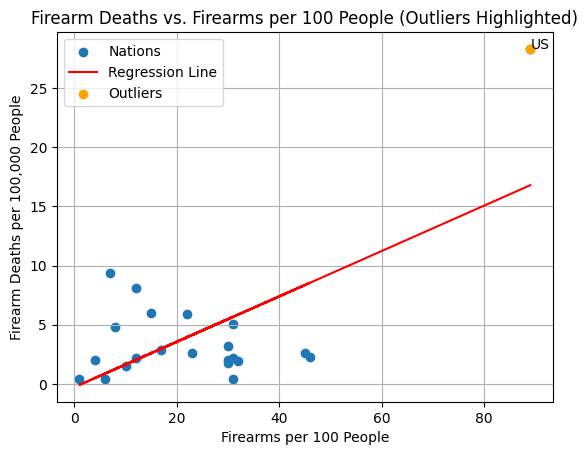

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Firearms.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
#print(df.head())

# Fitting the regression model: deaths as a function of firearms
model = sm.ols('deaths ~ firearms', data=df).fit()

# Creating the scatterplot with the regression line
plt.scatter(df['firearms'], df['deaths'], label='Nations')

# Plotting the regression line
plt.plot(df['firearms'], model.fittedvalues, color='red', label='Regression Line')

# Highlighting points that fall apart from the trend (outliers)
# We'll define outliers as points where the residual (difference between actual and fitted values) is large
residuals = df['deaths'] - model.fittedvalues

# Let's define an outlier as any point with a residual larger than 2 standard deviations of the residuals
std_residuals = residuals.std()
outliers = residuals.abs() > 2 * std_residuals

# Getting the outlier(s)
outliers_df = df[outliers]

# Print the outliers
print("\n outliers Data is shown ---> \n ", outliers_df)

# Highlighting the outliers in the scatterplot
plt.scatter(df[outliers]['firearms'], df[outliers]['deaths'], color='orange', label='Outliers')

# Adding labels to the outliers
for i in df[outliers].index:
    plt.text(df['firearms'][i], df['deaths'][i], df['Nation'][i])

# Adding labels and title
plt.xlabel("Firearms per 100 People")
plt.ylabel("Firearm Deaths per 100,000 People")
plt.title("Firearm Deaths vs. Firearms per 100 People (Outliers Highlighted)")
plt.legend()
plt.grid(True)
plt.show()


plt.show()



**Interpretation**


The red line represents the linear regression trend.  orange are outliers.

In a normally distributed dataset, about 95% of the data will fall within 2 standard deviations of the mean.

These outliers have residuals that are more than two standard deviations away from the predicted values based on the regression line

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Firearms.dat"
df = pd.read_csv(url, sep='\s+')

# Calculate the correlation with all observations
correlation_all = df['firearms'].corr(df['deaths'])
print(f"Correlation with all observations: {correlation_all:.2f}")

# Identify and remove the outlier (you may need to visually inspect the plot)
# For example, let's assume the outlier is the row with the highest number of firearms
outlier_index = df['firearms'].idxmax()

# Remove the outlier
df_without_outlier = df.drop(outlier_index)

# Calculate the correlation without the outlier
correlation_without_outlier = df_without_outlier['firearms'].corr(df_without_outlier['deaths'])
print(f"Correlation without the outlier: {correlation_without_outlier:.2f}")

# Interpretation: The correlation is likely to be much stronger without the outlier.
# The outlier might be driving the correlation, and removing it shows a more accurate relationship.


Correlation with all observations: 0.63
Correlation without the outlier: -0.18


**With the outlier (US):**
The United States has a very high number of firearms per 100 people (89) and a very high number of firearm deaths (28.3). Including this observation in the dataset increases the overall positive trend between firearms and deaths, resulting in a moderately strong positive correlation.

**Without the outlier:**
Once the outlier (US) is removed, the remaining countries show a much weaker or even negative relationship between firearm prevalence and firearm deaths. The negative correlation of -0.175 indicates that there is no clear linear relationship in the remaining data and even hints at a slight inverse trend.

This drastic difference occurs because the US is an extreme case that heavily influences the overall trend. When such a strong outlier is included, it can dominate the correlation, giving the impression of a stronger relationship than what exists for most of the data

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

In [ ]:
# Fitting the linear regression model with the outlier (full dataset)
model_with_outlier = sm.ols('deaths ~ firearms', data=df).fit()

# Removing the outlier (US)
outliers = df['Nation'] == 'US'
df_without_outlier = df[~outliers]

# Fitting the linear regression model without the outlier
model_without_outlier = sm.ols('deaths ~ firearms', data=df_without_outlier).fit()
# Printing the summary of the model with the outlier
print("\n----------Model with the outlier:------------\n\n")
print(model_with_outlier.summary())




----------Model with the outlier:------------


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     13.47
Date:                Sun, 13 Oct 2024   Prob (F-statistic):            0.00152
Time:                        05:51:20   Log-Likelihood:                -63.932
No. Observations:                  22   AIC:                             131.9
Df Residuals:                      20   BIC:                             134.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

In [ ]:
# Printing the summary of the model without the outlier
print("\n----------Model without the outlier:-------------\n\n")
print(model_without_outlier.summary())


----------Model without the outlier:-------------


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6009
Date:                Sun, 13 Oct 2024   Prob (F-statistic):              0.448
Time:                        05:51:37   Log-Likelihood:                -47.798
No. Observations:                  21   AIC:                             99.60
Df Residuals:                      19   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

**With the Outlier (US):**


**R-squared: 0.402**

This means that 40.2% of the variation in firearm deaths can be explained by the number of firearms in the dataset. There’s a moderately strong relationship between firearms and deaths.

**Slope: 0.192**
For each additional firearm per 100 people, firearm deaths increase by 0.192 per 100,000 people. This suggests that more firearms are associated with more deaths.

**p-value: 0.002**
The low p-value indicates a statistically significant relationship. We can reject the idea that there is no relationship between firearm ownership and deaths.

**Without the Outlier (US):**

**R-squared: 0.031**
Only 3.1% of the variation in firearm deaths is explained by the number of firearms, showing a very weak relationship.

**Slope: -0.033**
The relationship between firearms and deaths becomes slightly negative, but this is likely not meaningful.

**p-value: 0.448**
The high p-value means there is no statistically significant relationship between firearm ownership and deaths without the US data.

**Key Insights:**

The US, with its high number of firearms and deaths, strongly affects the results.
Without the US, the relationship between firearms and deaths is weak and not statistically significant, showing how one outlier can dramatically change the outcome of an analysis.

**Conclusion:**
The outlier (US) heavily influences the regression model. Including it shows a strong positive relationship between firearms and deaths, but without it, the relationship is weak. This highlights the importance of considering outliers in data analysis, as they can distort results.

## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat

(a) Construct the two scatterplots shown in Figure 6.3.

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the URL
url = "http://stat4ds.rwth-aachen.de/data/Covid19.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
df.head()
df.tail()

,day,cases
26,27,68440
27,28,85356
28,29,103321
29,30,122653
30,31,140904


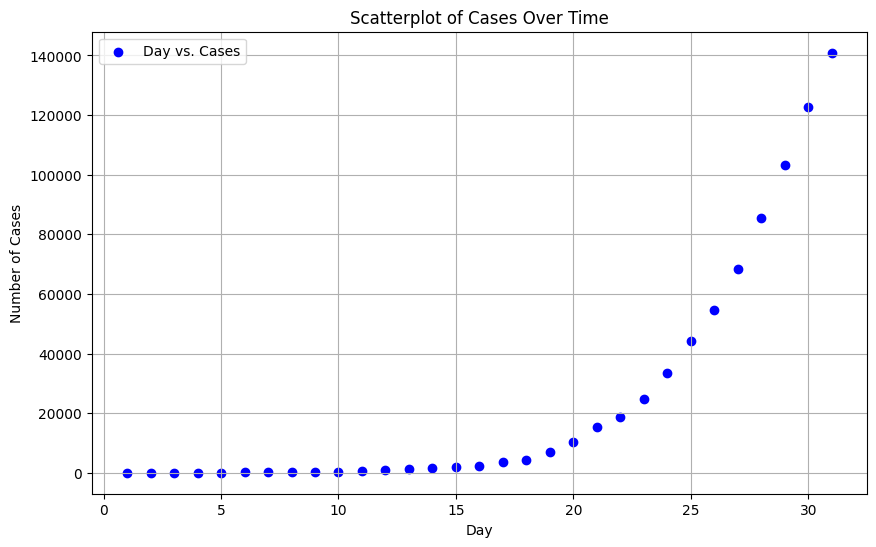

In [ ]:
# Scatterplot 1: Day vs. Cases
plt.figure(figsize=(10, 6))
plt.scatter(df['day'], df['cases'], color='blue', label='Day vs. Cases')
plt.title('Scatterplot of Cases Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.show()



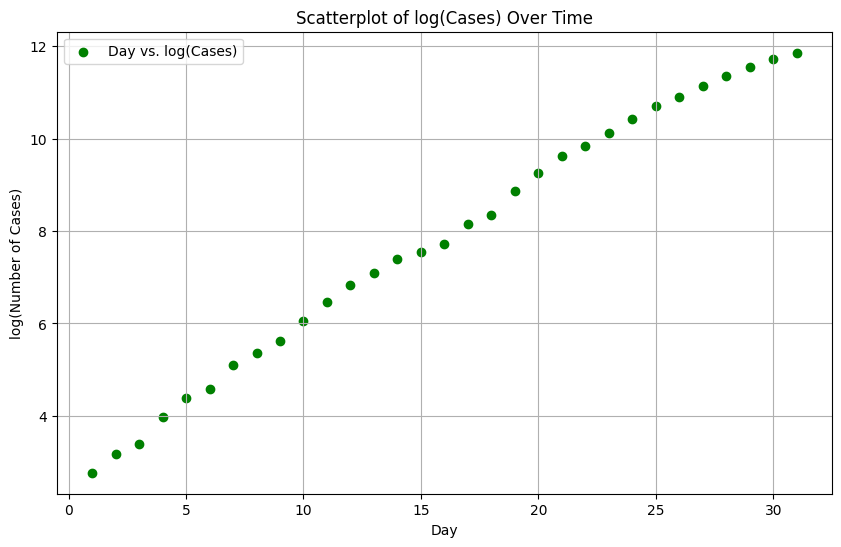

In [ ]:
# Scatterplot 2: Day vs. log(Cases)
plt.figure(figsize=(10, 6))
plt.scatter(df['day'], np.log(df['cases']), color='green', label='Day vs. log(Cases)')
plt.title('Scatterplot of log(Cases) Over Time')
plt.xlabel('Day')
plt.ylabel('log(Number of Cases)')
plt.grid(True)
plt.legend()
plt.show()

(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

In [ ]:
# Calculating the correlation between time (day) and cases
correlation_cases = df['day'].corr(df['cases'])

# Calculating the correlation between time (day) and log(cases)
correlation_log_cases = df['day'].corr(np.log(df['cases']))

# Printing the results
print(f"Correlation between time (day) and cases: {correlation_cases:.3f}")
print(f"Correlation between time (day) and log(cases): {correlation_log_cases:.3f}")

Correlation between time (day) and cases: 0.794
Correlation between time (day) and log(cases): 0.997


The correlation results are as follows:

**Correlation between time (day) and cases**:
𝑟
=
0.794
r=0.794

This indicates a moderately strong positive correlation between time (day) and the number of cases. As time progresses, the number of cases increases, but the relationship is not perfectly linear, reflecting the rapid, possibly exponential, growth of cases.

**Correlation between time (day) and log(cases)**:
𝑟
=
0.997
r=0.997

This indicates a very strong positive correlation between time and the logarithm of cases. The log-transformed data shows a near-perfect linear relationship with time, suggesting that the number of cases is growing exponentially over time.

**Interpretation**:
The raw case data has a moderately strong correlation with time, but the relationship becomes much stronger when the cases are log-transformed, implying that the case growth is exponential in nature.

The log transformation linearizes the exponential growth, leading to the near-perfect correlation with time

(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

In [ ]:
import numpy as np  # Import numpy for numerical computations
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Load the data from the URL
url = "http://stat4ds.rwth-aachen.de/data/Covid19.dat"
df = pd.read_csv(url,sep='\s+')

# Adding a column for log-transformed cases
df['log_cases'] = np.log(df['cases'])

# Fitting the linear regression model: log(cases) ~ day
model = smf.ols('log_cases ~ day', data=df).fit()

# Getting the model parameters (coefficients)
intercept, slope = model.params

# Reporting the prediction equation
print(f"Prediction equation: log(cases) = {intercept:.3f} + {slope:.3f} * day")

# Calculating exp(beta1) where beta1 is the slope
exp_slope = np.exp(slope)
print(f"exp(beta1) = {exp_slope:.3f}")

# Explanation: exp(slope) gives the daily multiplicative growth factor in actual case counts
print(f"The predicted count at day (x+1) \n  equals the predicted count at day x multiplied by\n {exp_slope:.2f}, indicating a daily increase of about 36%.")

Prediction equation: log(cases) = 2.844 + 0.309 * day
exp(beta1) = 1.362
The predicted count at day (x+1) 
  equals the predicted count at day x multiplied by
 1.36, indicating a daily increase of about 36%.


## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

In [ ]:
import numpy as np  # Import numpy for numerical computations
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import pandas as pd

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Florida.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
df.head()


,County,Crime,Income,HS,Urban
0,ALACHUA,104,22.1,82.7,73.2
1,BAKER,20,25.8,64.1,21.5
2,BAY,64,24.7,74.7,85.0
3,BRADFORD,50,24.6,65.0,23.2
4,BREVARD,64,30.5,82.3,91.9


In [ ]:


# Fit the model without adjusting for urbanization (Crime ~ HS)
model_no_adjustment = smf.ols('Crime ~ HS', data=df).fit()

# Fit the model with urbanization as a control (Crime ~ HS + Urban)
model_with_urban = smf.ols('Crime ~ HS + Urban', data=df).fit()

# Output the model summaries for comparison
print("Model without adjusting for urbanization:")
print(model_no_adjustment.summary())



Model without adjusting for urbanization:
                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           6.81e-05
Time:                        06:05:56   Log-Likelihood:                -310.05
No. Observations:                  67   AIC:                             624.1
Df Residuals:                      65   BIC:                             628.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

In [ ]:
print("\nModel adjusting for urbanization:")
print(model_with_urban.summary())


Model adjusting for urbanization:
                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.38e-09
Time:                        06:09:29   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.

**1. Model without Adjusting for Urbanization (Crime ~ HS):**

**R-squared: 0.218**
This means that about 22% of the variation in crime rates can be explained by the high school graduation rate alone.

**HS coefficient: 1.49**
For each 1% increase in high school graduation rates, the crime rate increases by 1.49 units. This suggests that higher education levels are associated with higher crime, which seems unusual.

**Significance:**
This relationship is statistically significant (p < 0.001), meaning it is unlikely to be due to chance.

**2. Model Adjusting for Urbanization (Crime ~ HS + Urban):**

**R-squared: 0.471**
When we adjust for urbanization, 47% of the variation in crime rates is explained by both education and urbanization. This is a much better fit than the model without urbanization.

**HS coefficient: -0.58**
After adjusting for urbanization, the relationship between education and crime becomes negative, but it’s no longer significant. This means education doesn't have a clear effect on crime once we account for urbanization.

**Urban coefficient: 0.68**
For each 1% increase in urban population, crime rates increase by 0.68 units. This relationship is highly significant, showing that urban areas tend to have higher crime rates.

**Key Takeaways:**
Without Urbanization: It looked like more education led to more crime, which was strange.
With Urbanization: After accounting for urbanization, the link between education and crime disappears, and urbanization becomes the key factor driving crime rates.

**Why This Happens:**
This is an example of Simpson's Paradox. Initially, education seemed linked to higher crime, but after adjusting for urbanization (which affects both education and crime), we see that urbanization, not education, explains the higher crime rates.

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

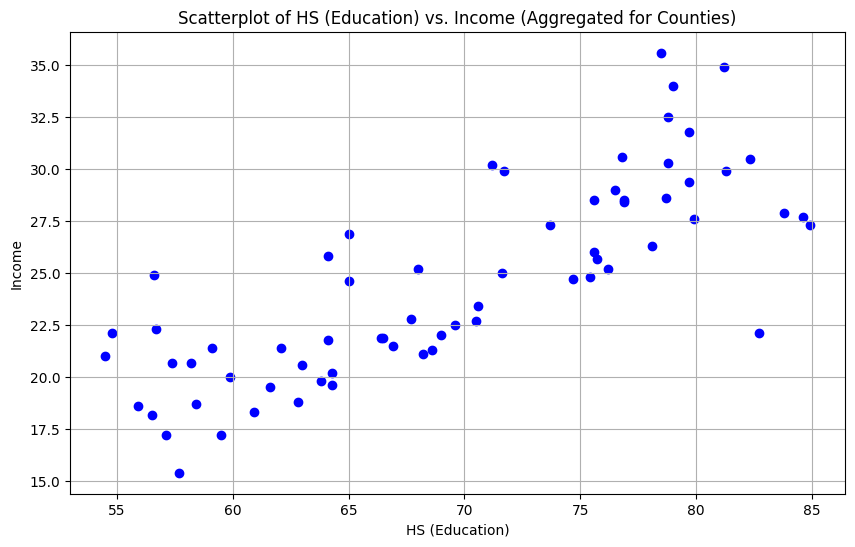

correlation_aggregated --> 0.79


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Florida.dat"
df = pd.read_csv(url, sep='\s+')

## Scatterplot between HS (education) and Income (Aggregated Data)
plt.figure(figsize=(10, 6))
plt.scatter(df['HS'], df['Income'], color='blue')
plt.title('Scatterplot of HS (Education) vs. Income (Aggregated for Counties)')
plt.xlabel('HS (Education)')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# Calculating the correlation between HS and Income for the aggregated data (county level)
correlation_aggregated = df['HS'].corr(df['Income'])
print(f"correlation_aggregated --> {correlation_aggregated:.2f}")


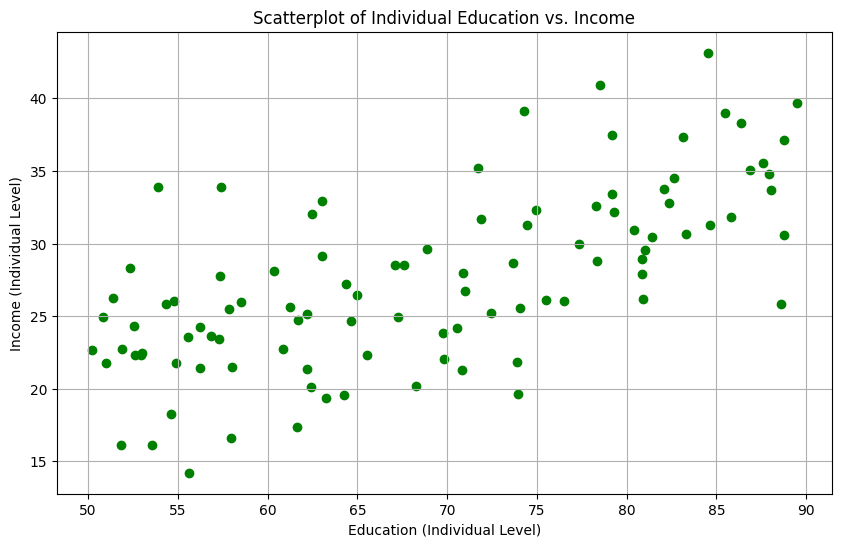

correlation_individual --> 0.67


In [ ]:
# Generating hypothetical individual-level data with weaker correlation
np.random.seed(42)
individual_education = np.random.uniform(50, 90, 100)  # Individual education levels
individual_income = individual_education * 0.4 + np.random.normal(0, 5, 100)  # Adding noise for weaker correlation

# Scatterplot for individual-level data
plt.figure(figsize=(10, 6))
plt.scatter(individual_education, individual_income, color='green')
plt.title('Scatterplot of Individual Education vs. Income')
plt.xlabel('Education (Individual Level)')
plt.ylabel('Income (Individual Level)')
plt.grid(True)
plt.show()

# Calculating the correlation between HS and Income individual level
correlation_individual = np.corrcoef(individual_education, individual_income)[0, 1]


print(f"correlation_individual --> {correlation_individual:.2f}")




**Interpretation:**
Aggregated Data (Left Plot): The relationship between education and income is strong at the county level, as seen by a clear positive trend. Counties with higher education levels tend to have higher average incomes, giving a correlation of about 0.79.

I**ndividual-Level Data (Right Plot)**: In the individual-level scatterplot, the relationship between education and income is much weaker, with a more dispersed pattern. Although there is a slight positive trend, many individual factors influence income, weakening the overall correlation.

**Ecological Fallacy:**
This side-by-side comparison demonstrates the ecological fallacy: making predictions about individual behavior based on aggregated group data can be misleading. While a strong trend is observed at the county level, the individual-level data shows much more variability, meaning the same relationship may not apply uniformly to individuals.

(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

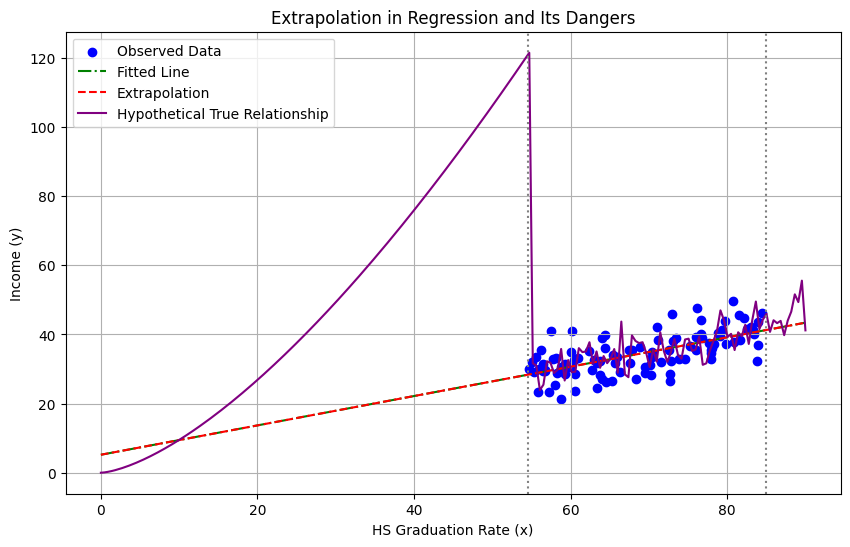

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulate some data for the observed range
np.random.seed(42)
x_observed = np.random.uniform(54.5, 84.9, 100)  # Education (HS graduation rate)
y_observed = 0.5 * x_observed + np.random.normal(0, 5, 100)  # Income with noise


# Fit a linear regression model to the observed data
coefficients = np.polyfit(x_observed, y_observed, 1)
linear_fit = np.poly1d(coefficients)

# Generate values for extrapolation (extending beyond the observed range)
x_extrapolated = np.linspace(0, 90, 200)
y_extrapolated = linear_fit(x_extrapolated)

# Hypothetical true relationship: curve downward as x approaches 0
y_true = 0.5 * x_extrapolated + np.random.normal(0, 5, 200)
y_true[x_extrapolated < 55] = 0.3 * x_extrapolated[x_extrapolated < 55] ** 1.5

# Plot the observed data, the fitted line, and the extrapolation
plt.figure(figsize=(10, 6))

# Plot the observed data
plt.scatter(x_observed, y_observed, color='blue', label='Observed Data')

# Plot the fitted regression line in the observed range
plt.plot(x_extrapolated, y_extrapolated, color='green', linestyle='-.', label='Fitted Line')

# Show extrapolation (dashed line)
plt.plot(x_extrapolated, y_extrapolated, color='red', linestyle='--', label='Extrapolation')

# Show the hypothetical true relationship
plt.plot(x_extrapolated, y_true, color='purple', linestyle='-', label='Hypothetical True Relationship')

# Add labels and title
plt.title('Extrapolation in Regression and Its Dangers')
plt.xlabel('HS Graduation Rate (x)')
plt.ylabel('Income (y)')
plt.axvline(x=54.5, color='gray', linestyle=':')
plt.axvline(x=84.9, color='gray', linestyle=':')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


The plot above illustrates extrapolation in regression and its risks:

Blue points represent the observed data (education vs. income) within the range of HS graduation rate between 54.5 and 84.9.

The green line is the fitted regression line based on the observed data, showing the linear relationship within the range.

The red dashed line extends the fitted line beyond the observed range, demonstrating extrapolation. This extension predicts income for x = 0, which is far from the observed data and potentially unreliable.

The purple line represents a hypothetical true relationship where income decreases more sharply as education drops below the observed range, showing how extrapolation can lead to incorrect predictions.

It is NOT sensible to use the least squares line to predict income when HS = 0 because it is extrapolation.
The observed values of HS are between 54.5 and 84.9. Extrapolating outside this range can lead to unreliable predictions.

## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Students.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
print(df.head())


   subject  gender  age  hsgpa  cogpa  dhome  dres    tv  sport  news  aids  \
0        1       0   32    2.2    3.5      0   5.0   3.0      5     0     0   
1        2       1   23    2.1    3.5   1200   0.3  15.0      7     5     6   
2        3       1   27    3.3    3.0   1300   1.5   0.0      4     3     0   
3        4       1   35    3.5    3.2   1500   8.0   5.0      5     6     3   
4        5       0   23    3.1    3.5   1600  10.0   6.0      6     3     0   

   veg  affil  ideol  relig  abor  affirm  life  
0    0      2      6      2     0       0     1  
1    1      1      2      1     1       1     3  
2    1      1      2      2     1       1     3  
3    0      3      4      1     1       1     2  
4    0      3      1      0     1       0     2  


(b)  Summarize the estimated effect of *hsgpa.*

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np




# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()


# Retrieve the prediction equation coefficients
intercept = model.params['Intercept']
coef_hsgpa = model.params['hsgpa']
coef_tv = model.params['tv']
coef_sport = model.params['sport']


# Prediction equation
prediction_equation = f"cogpa = {intercept:.3f} + {coef_hsgpa:.3f}*hsgpa + {coef_tv:.3f}*tv + {coef_sport:.3f}*sport"
print(f"\n\nPrediction Equation: {prediction_equation}\n\n\n")



# Report the prediction equation
print(model.summary())

# Summarize the estimated effect of hsgpa
estimated_effect_hsgpa = model.params['hsgpa']
print(f"\nEstimated effect of hsgpa: {estimated_effect_hsgpa:.2f}")
print(
    "Interpretation: For a one-unit increase in high school GPA (hsgpa), we expect a"
    f" {estimated_effect_hsgpa:.2f} unit increase in college GPA (cogpa), \n holding other predictors constant."
)




Prediction Equation: cogpa = 2.815 + 0.209*hsgpa + 0.003*tv + -0.014*sport



                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.101
Time:                        00:12:01   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

**Interpretation of P-values:**
Intercept (P-value = 0.000): The P-value for the intercept is less than 0.05, indicating that the intercept is statistically significant. This means that when all predictor variables (hsgpa, tv, and sport) are zero, the model predicts a cogpa that is statistically different from zero.

hsgpa (P-value = 0.044): The P-value for hsgpa is 0.044, which is less than 0.05. This suggests that hsgpa is a significant predictor of cogpa. An increase in high school GPA (hsgpa) is associated with an increase in college GPA (cogpa).

tv (P-value = 0.629): The P-value for tv is 0.629, which is much greater than 0.05. This means that the amount of time spent watching TV does not significantly affect college GPA (cogpa) in this model.

sport (P-value = 0.230): The P-value for sport is 0.230, which is also greater than 0.05. This suggests that participation in sports is not a statistically significant predictor of college GPA (cogpa).

Conclusion:
hsgpa is the only significant predictor in this model (P-value < 0.05).
tv and sport do not significantly influence cogpa, based on the P-values, as both are greater than 0.05.

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`Your answer goes here`

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np




# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()

# Report the prediction equation
print(model.summary())

# R-squared
r_squared = model.rsquared
print(f"\nR-squared: {r_squared:.2f}")

# Adjusted R-squared
adjusted_r_squared = model.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

# Multiple correlation (square root of R-squared)
multiple_correlation = np.sqrt(r_squared)
print(f"Multiple correlation: {multiple_correlation:.2f}")


                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 13 Oct 2024   Prob (F-statistic):              0.101
Time:                        06:24:06   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8154      0.368      7.655      0.0

R-squared (0.10) and Adjusted R-squared (0.06) both show that the model is not explaining much of the variation in college GPA.

Multiple correlation (0.32) indicates a weak relationship between the predictors and the GPA, further supporting the idea that this model doesn't do a great job predicting college GPA based on the chosen variables

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


In [ ]:

import pandas as pd
import statsmodels.formula.api as sm



# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()

# Test H0: β1 = β2 = β3 = 0
print(model.summary())

# The p-value for the F-statistic tests the overall significance of the model.
# It represents the probability of observing the data if all the coefficients are zero.
f_statistic_p_value = model.f_pvalue
print(f"\nP-value for F-statistic (testing H0: β1 = β2 = β3 = 0): {f_statistic_p_value:.3f}")


                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 13 Oct 2024   Prob (F-statistic):              0.101
Time:                        06:43:37   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8154      0.368      7.655      0.0

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

In [ ]:

import pandas as pd


# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()



# Extract the p-value for hsgpa
p_value_hsgpa = model.pvalues['hsgpa']

# Set the significance level
alpha = 0.05

# Conduct the test
if p_value_hsgpa < alpha:
    print(f"The p-value for hsgpa ({p_value_hsgpa:.3f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis that the coefficient for hsgpa is equal to zero.")
    print("This suggests that hsgpa has a statistically significant effect on cogpa, even after adjusting for tv and sport.")
else:
    print(f"The p-value for hsgpa ({p_value_hsgpa:.3f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis that the coefficient for hsgpa is equal to zero.")
    print("This suggests that hsgpa does not have a statistically significant effect on cogpa, after adjusting for tv and sport.")

    # Print the model summary to see the p-value for hsgpa
print("\n\n\n",model.summary())


The p-value for hsgpa (0.044) is less than the significance level (0.05).
We reject the null hypothesis that the coefficient for hsgpa is equal to zero.
This suggests that hsgpa has a statistically significant effect on cogpa, even after adjusting for tv and sport.



                             OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.101
Time:                        00:25:32   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:   

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np


# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()

# Get the p-values for individual effects
p_values = model.pvalues[['hsgpa', 'tv', 'sport']]

# Number of tests
num_tests = len(p_values)

# Bonferroni-adjusted significance level
alpha_bonferroni = 0.05 / num_tests

# Check if the p-values are less than the adjusted significance level
for variable, p_value in p_values.items():
  if p_value < alpha_bonferroni:
    print(f"The effect of {variable} is significant at the Bonferroni-adjusted level (alpha = {alpha_bonferroni:.4f}).")
  else:
    print(f"The effect of {variable} is not significant at the Bonferroni-adjusted level (alpha = {alpha_bonferroni:.4f}).")


print("\nReasons:")
print("The Bonferroni correction adjusts the significance level for multiple comparisons to control the familywise error rate (FWER).")
print("In this case, we have three individual tests (hsgpa, tv, sport), so the Bonferroni-adjusted significance level is 0.05/3.")
print("If a p-value is less than this adjusted significance level, we can reject the null hypothesis for that particular variable.")
print("This helps to reduce the chance of making a Type I error (false positive) when conducting multiple tests.")



The effect of hsgpa is not significant at the Bonferroni-adjusted level (alpha = 0.0167).
The effect of tv is not significant at the Bonferroni-adjusted level (alpha = 0.0167).
The effect of sport is not significant at the Bonferroni-adjusted level (alpha = 0.0167).

Reasons:
The Bonferroni correction adjusts the significance level for multiple comparisons to control the familywise error rate (FWER).
In this case, we have three individual tests (hsgpa, tv, sport), so the Bonferroni-adjusted significance level is 0.05/3.
If a p-value is less than this adjusted significance level, we can reject the null hypothesis for that particular variable.
This helps to reduce the chance of making a Type I error (false positive) when conducting multiple tests.


(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

In [ ]:


import pandas as pd
import statsmodels.formula.api as sm



# Fit the linear model
model = sm.ols('cogpa ~ hsgpa + tv + sport', data=df).fit()

# Print the model summary to see the p-values for tv and sport
print(model.summary())

# Extract the p-values for tv and sport
p_value_tv = model.pvalues['tv']
p_value_sport = model.pvalues['sport']

# Check if the effects of tv and sport are significant at the 0.05 level
if p_value_tv < 0.05:
  print("The effect of tv is significant at the 0.05 level.")
else:
  print("The effect of tv is not significant at the 0.05 level.")

if p_value_sport < 0.05:
  print("The effect of sport is significant at the 0.05 level.")
else:
  print("The effect of sport is not significant at the 0.05 level.")





                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 13 Oct 2024   Prob (F-statistic):              0.101
Time:                        06:51:46   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8154      0.368      7.655      0.0

In [ ]:
# Propose an alternative model (remove non-significant variables)
# Based on the p-values, if tv and/or sport are not significant, we can consider removing them from the model.
# For example, if only tv is not significant:
alternative_model = sm.ols('cogpa ~ hsgpa ', data=df).fit()
print("\nAlternative model (removing tv and sports):")
print(alternative_model.summary())



Alternative model (removing tv and sports):
                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.871
Date:                Sun, 13 Oct 2024   Prob (F-statistic):             0.0313
Time:                        06:51:52   Log-Likelihood:                -19.479
No. Observations:                  60   AIC:                             42.96
Df Residuals:                      58   BIC:                             47.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

**In this alternative model, both tv and sport have been removed, leaving only hsgpa as the predictor of cogpa. Here's a simplified interpretation of the results:**

**R-squared:**

The R-squared is 0.077, meaning that this model explains 7.7% of the variability in cogpa based on hsgpa.
This is slightly lower than the previous models, but expected as fewer predictors are included.
**Adjusted R-squared:**

The adjusted R-squared is 0.062, which accounts for the number of predictors and suggests that the model still explains about 6.2% of the variance in cogpa.
**P-value for F-statistic:**

The model’s overall significance is supported by the F-statistic p-value of 0.0313, meaning that the relationship between hsgpa and cogpa is statistically significant at the 5% level.
**Coefficient of hsgpa:**

The coefficient for hsgpa is 0.2128, meaning that for each unit increase in hsgpa, the expected increase in cogpa is about 0.213 points.
This is still statistically significant with a p-value of 0.031, meaning the relationship between high school GPA and college GPA is important in predicting performance.
**Intercept:**

The intercept of 2.749 means that, on average, a student with a high school GPA of 0 (theoretically) would have a starting college GPA of around 2.749. This value is mostly used to position the regression line.
Model Fit:

AIC (42.96) and BIC (47.15) are slightly lower than previous models, suggesting a simpler fit with fewer predictors.

**Conclusion:**
This model focuses only on the relationship between hsgpa and cogpa. The removal of tv and sport simplifies the model but maintains the key relationship between high school GPA and college GPA.

 While the model explains less variance overall, it’s more straightforward and still statistically significant, making it a useful simplified model.

The inclusion of only hsgpa reduces complexity, and this predictor remains statistically significant, indicating its clear role in predicting college GPA.

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

In [ ]:


import pandas as pd

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/UN.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
print(df.head())


      Nation   GDP   HDI   GII  Fertility   CO2  Homicide  Prison  Internet
0    Algeria  12.8  0.72  0.42        2.8   3.2       0.8     162        17
1  Argentina  14.7  0.81  0.38        2.2   4.7       5.5     147        60
2  Australia  42.3  0.93  0.11        1.9  16.5       1.1     130        83
3    Austria  43.1  0.88  0.06        1.4   7.8       0.8      98        81
4    Belgium  39.5  0.88  0.07        1.8   8.8       1.8     108        82


In [ ]:
#multiple regression model


import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")



# Independent variables (excluding the dependent variable 'Internet')
X = df[['GDP', 'HDI', 'GII', 'Fertility', 'CO2', 'Homicide', 'Prison']]
X = sm.add_constant(X)  # Adding a constant for the intercept

# Dependent variable (Internet)
Y = df['Internet']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Internet   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     27.04
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.95e-12
Time:                        23:30:40   Log-Likelihood:                -154.04
No. Observations:                  42   AIC:                             324.1
Df Residuals:                      34   BIC:                             338.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1583     38.773      0.288      0.7

In [ ]:
# BI Variate


# Predictor Variable (GDP) and Target Variable (Internet)
X_bivariate = df['GDP']
y_bivariate = df['Internet']

# Add constant to the predictor
X_bivariate = sm.add_constant(X_bivariate)

# Fit Bivariate Regression Model
bivariate_model = sm.OLS(y_bivariate, X_bivariate).fit()

# Print summary of the model
print(bivariate_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Internet   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.55e-14
Time:                        23:25:57   Log-Likelihood:                -162.74
No. Observations:                  42   AIC:                             329.5
Df Residuals:                      40   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1341      3.749      6.971      0.0

In this analysis, we compared two models to predict Internet usage:

Bivariate Model (GDP alone):
R-squared: 0.769: This model explains about 77% of the variation in Internet usage using just GDP.
GDP Coefficient: 1.406: For every unit increase in GDP, Internet usage increases by 1.41%, showing GDP is a strong predictor on its own.

Multivariable Model (GDP + Other Variables):
R-squared: 0.848: This model, which includes GDP and other factors like HDI, GII, and Fertility, explains 85% of the variation in Internet usage.

GDP Coefficient: 0.44: The effect of GDP is much weaker in this model because other factors (e.g., HDI, GII) share some of the explanation that was originally attributed to GDP alone.

Key Points:
Multicollinearity: Some predictors, like GDP, HDI, and GII, are related, causing multicollinearity. This makes it hard to separate their individual effects, which is why GDP's influence drops in the multivariable model.

Adjusted R²: The slight increase in adjusted R² from 0.764 to 0.816 means adding other variables doesn’t dramatically improve the model, as they overlap with GDP’s effect.


**Conclusion: **GDP alone explains most of the Internet usage variation, but adding more variables gives a slightly better understanding, though multicollinearity weakens GDP's individual role in the multivariable model.

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

In [ ]:


import pandas as pd

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/Houses.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
print(df.head())


   case   price  size  new  taxes  bedrooms  baths
0     1  419.85  2048    0   3104         4      2
1     2  219.75   912    0   1173         2      1
2     3  356.55  1654    0   3076         4      2
3     4  300.00  2068    0   1608         3      2
4     5  239.85  1477    0   1454         3      3


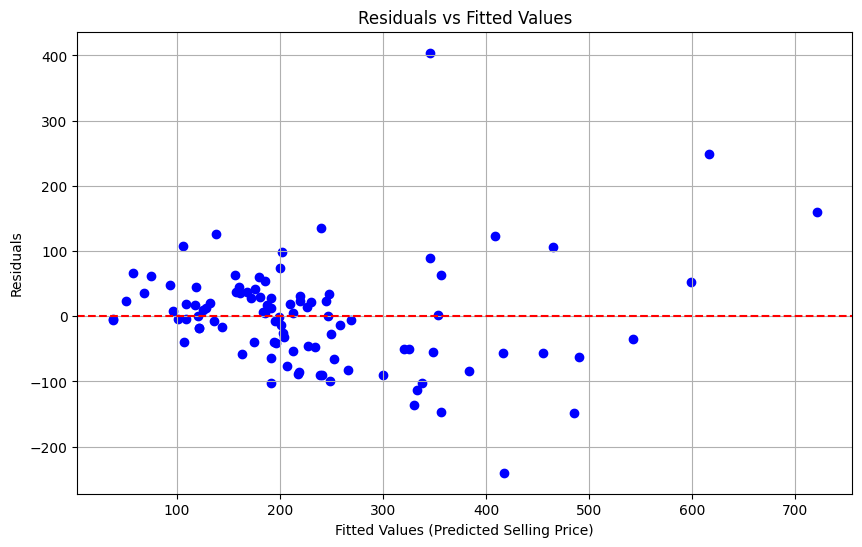

In [ ]:
import statsmodels.api as sm
import numpy as np

# Define the dependent (Y) and independent (X) variables
X = df['taxes']
Y = df['price']

# Add a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Calculate the fitted values (predicted prices) and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Plot the residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Selling Price)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


**Interpretation**
**Widening Spread:**

As the fitted values (predicted selling prices) increase, the residuals (the differences between observed and predicted values) show a widening spread. This suggests that the variance of the residuals is not constant; it increases as the predicted prices rise.
This pattern indicates heteroscedasticity, where the variability of the selling price is dependent on the level of the tax bill (and consequently the predicted price).
Implication:

In a regression model where the assumption of constant variance holds (homoscedasticity), the residuals should be evenly spread around the horizontal line (y = 0) with a consistent width across all fitted values.
The observed funnel shape (narrow at lower prices and wider at higher prices) violates this assumption, meaning the model’s error terms do not have constant variance.

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")



# Define the dependent (Y) and independent (X) variables for GLM
X = df[['taxes', 'new']]  # Use taxes and whether the house is new as independent variables
Y = df['price']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the normal GLM with the identity link function
normal_glm = sm.GLM(Y, X, family=sm.families.Gaussian()).fit()

# Fit the gamma GLM with the log link function to avoid the warning
gamma_glm = sm.GLM(Y, X, family=sm.families.Gamma(link=sm.genmod.families.links.log())).fit()

# Print the summaries of both models
print("Normal GLM Summary:")
print(normal_glm.summary())


Normal GLM Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          6212.7
Method:                          IRLS   Log-Likelihood:                -577.09
Date:                Sun, 13 Oct 2024   Deviance:                   6.0264e+05
Time:                        06:55:53   Pearson chi2:                 6.03e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9651     14.695

In [ ]:
print("\nGamma GLM Summary:")
print(gamma_glm.summary())


Gamma GLM Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                        0.088628
Method:                          IRLS   Log-Likelihood:                -553.60
Date:                Sun, 13 Oct 2024   Deviance:                       9.3938
Time:                        06:55:59   Pearson chi2:                     8.60
No. Iterations:                    11   Pseudo R-squ. (CS):             0.9214
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6764      0.056

To determine whether the normal Generalized Linear Model (GLM) structure with constant variability in
𝑌
Y (selling price) is appropriate, we need to inspect whether the residuals of the regression model (errors between observed and predicted values) have constant variance (homoscedasticity). If the variance increases or decreases with the fitted values, the assumption of constant variability is violated, indicating heteroscedasticity.

**Interpretation of the Output:**

**1. Normal GLM Summary:**
Model Type: This is a Gaussian (Normal) GLM with an identity link function, meaning the relationship between the predictors and the response (price) is assumed to be linear.
**Coefficients:**

Intercept (const): 41.97
This represents the baseline selling price when taxes are zero, and the house is not new.
Taxes: 0.0951
For each additional dollar in taxes, the selling price increases by about 0.095 (in thousands), indicating a positive relationship.
New: 86.20
If the house is new, the selling price increases by 86.20 (in thousands). This coefficient is statistically significant, indicating that new houses have a higher price compared to older ones.
**Statistical Significance:**
The p-values for all coefficients (taxes and new) are below 0.05, meaning they are statistically significant, and there is a strong relationship between these variables and the selling price.

**2. Gamma GLM Summary:**
Model Type: This is a Gamma GLM with a log link function, which is suitable when the response variable (price) is strictly positive and the variance increases with the mean.
**Coefficients:**
Intercept (const): 4.676
Represents the baseline log-transformed price when taxes are zero, and the house is not new.
Taxes: 0.0003
For each additional dollar in taxes, the log of the selling price increases by 0.0003. This suggests that taxes positively affect the price, but the effect is small when considering the log scale.
New: 0.2744
When a house is new, the log-transformed price increases by 0.2744. Converting this back to the original scale indicates that new houses have a higher price, similar to the normal GLM.

**Statistical Significance:**
All coefficients (taxes and new) have p-values below 0.05, indicating that they are statistically significant.

**Overall Interpretation:**
Both models suggest that taxes and whether the house is new significantly affect the selling price.
In both models, new houses tend to be priced higher than older ones, confirming that being new has a positive impact on price.

The normal GLM shows a direct increase in price, while the Gamma GLM, using a log transformation, shows how the price behaves multiplicatively.

This indicates that both taxes and the status of being new are important predictors of house prices, and their effects are statistically significant in both models.

(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

**1. Normal GLM (Gaussian Model)**

The Normal GLM assumes constant variance (homoscedasticity) regardless of the mean. This means:

The variability (spread) of selling prices stays the same as the mean selling price changes.
If the mean selling price is 100 thousand or 500 thousand dollars, the variability (standard deviation) in the prices remains constant because, in a Gaussian model with an identity link function, the variance is independent of the mean.

**Implication:**

If you observe a selling price of 100 thousand or 500 thousand dollars, the uncertainty or spread of those prices around the mean would be similar. This assumption may not be realistic when prices vary greatly, especially at higher price ranges.

2. Gamma GLM (Gamma Model with Log Link)
The Gamma GLM with a log link function assumes that variability is proportional to the mean. In other words:

As the mean selling price increases, the variance increases proportionally.
If the mean selling price is 100 thousand dollars, the variability (spread) is smaller compared to when the mean selling price is 500 thousand dollars.
Implication:

For a mean selling price of 100 thousand dollars, the spread around this price is relatively tight (small variability).
As the mean selling price increases to 500 thousand dollars, the spread becomes wider, reflecting greater variability. This is often a more realistic model for financial and economic data, where higher values tend to have more variability.

**Summary:**
In the Normal GLM, the variability remains constant regardless of the mean selling price.
In the Gamma GLM, the variability increases proportionally with the mean selling price.
The Gamma model is generally more appropriate when modeling prices, as it accounts for the natural increase in variability associated with higher mean prices.

(d) Which model is preferred according to AIC?

The AIC (Akaike Information Criterion) is a measure used to compare models, with a lower AIC indicating a better model fit relative to other models.

Let's compare the AIC values of the two models:

Normal GLM AIC: 6212.7
Gamma GLM AIC: 553.6

**Interpretation:**
The Gamma GLM has a much lower AIC (553.6) compared to the Normal GLM (6212.7).
Since the Gamma GLM has the lower AIC, it is the preferred model. This suggests that the Gamma model provides a better fit to the data, likely due to its ability to account for the proportional variability (heteroscedasticity) in the selling prices as the mean increases.
Thus, the Gamma GLM is preferred based on the AIC criterion.

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

In [ ]:
# prompt: A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (kg) at the original observation.
# A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (kg) at the original observation. (a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the sheep data (replace 'sheep_data.csv' with your actual file)
# Assuming the data has columns named 'survival' (0 or 1) and 'weight'
try:
    df = pd.read_csv('sheep_data.csv')
except FileNotFoundError:
    print("Error: 'sheep_data.csv' not found. Please upload the data file.")
    # You can also provide a sample DataFrame for testing purposes:
    # df = pd.DataFrame({'survival': [1, 0, 1, 1, 0], 'weight': [50, 40, 55, 60, 35]})


# Fit a logistic regression model (Generalized Linear Model with binomial family and logit link)
model = smf.glm('survival ~ weight', data=df, family=sm.families.Binomial()).fit()

# Print the model summary
print(model.summary())


# Interpretation:
# 1. Coefficients:
#   - Intercept: The intercept represents the log-odds of survival when the weight is 0.
#   - weight: This coefficient represents the change in log-odds of survival for a one-unit increase in weight.
# 2. P-values:
#   - Check the p-value for the 'weight' coefficient. If it's less than your significance level (e.g., 0.05), then weight is a statistically significant predictor of survival.
# 3. Odds Ratio:
#   - Calculate the odds ratio by exponentiating the 'weight' coefficient: np.exp(model.params['weight'])
#   - The odds ratio tells you how much the odds of survival change for a one-unit increase in weight.  An odds ratio greater than 1 means increased odds of survival with increasing weight, and less than 1 means decreased odds.

# Example interpretation (assuming weight is significant):
# "The model suggests that weight is a significant predictor of sheep survival (p < 0.05).
# For each 1 kg increase in weight, the odds of survival increase by [Odds Ratio] times."

In [ ]:

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the data from the URL (replace with the actual URL if needed)
url = "https://stat4ds.rwth-aachen.de/data/Sheep.dat"
df = pd.read_csv(url,sep='\s+' )

# Fit a logistic regression model using statsmodels
model = smf.glm('survival ~ weight', data=df, family=sm.families.Binomial()).fit()

# Print the model summary
print(model.summary())

# Example:
# weight = 60
probability_survival = model.predict(pd.DataFrame({'weight': [60]}))
print(f"Probability of survival for a sheep weighing 60 kg: {probability_survival[0]:.3f}")



                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Sun, 13 Oct 2024   Deviance:                       1290.4
Time:                        23:10:19   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0298      0.251     -8.103      0.0

**Interpretation of the Generalized Linear**
Model (GLM) Results
Intercept: -2.0298
The intercept represents the log-odds of survival for a sheep with a weight of 0 kg (which isn't realistic but is a baseline for the model). A negative value means that at very low weights, the odds of survival are low.

**Weight Coefficient: 0.1755**
The weight coefficient shows the relationship between the weight of the sheep and the probability of survival. A positive coefficient means that as the weight increases, the probability of survival also increases. Specifically, for each additional kilogram of weight, the log-odds of survival increase by 0.1755.

**P-value for Weight:** The very small p-value (0.000) indicates that weight is statistically significant in predicting survival. The confidence interval (0.148, 0.203) confirms that the effect of weight on survival is positive and not due to random chance.

**Pseudo R-squared (Cox & Snell):** 0.1294
This indicates that about 12.94% of the variability in the survival outcome is explained by the sheep's weight, which is a modest effect.

(b)  For what weight values do the sheep have more than a 50% chance of survival?

Optimization terminated successfully.
         Current function value: 0.474774
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survival   No. Observations:                 1359
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.1273
Time:                        23:12:50   Log-Likelihood:                -645.22
converged:                       True   LL-Null:                       -739.38
Covariance Type:            nonrobust   LLR p-value:                 7.410e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0298      0.251     -8.103      0.000      -2.521      -1.539
weight         0.1755      0.

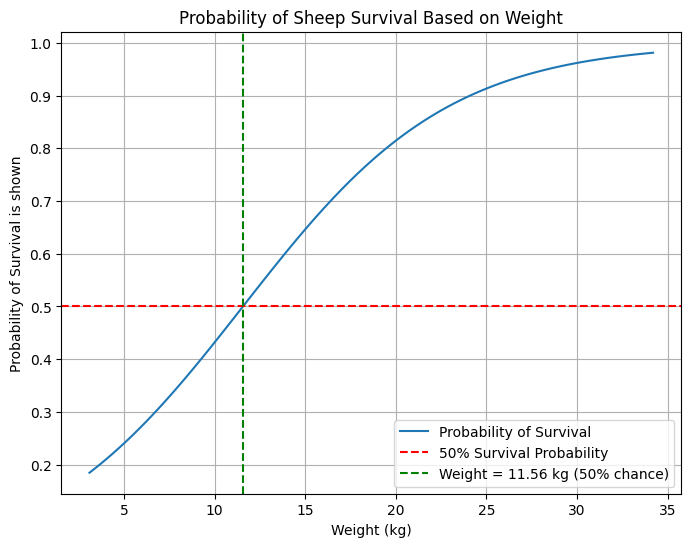

In [ ]:


import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib library





# Fit a logistic regression model
model = sm.logit('survival ~ weight', data=df).fit()

# Print the model summary
print(model.summary())

# Get the coefficients
intercept = model.params['Intercept']
slope = model.params['weight']

# Function to calculate the probability of survival
def survival_probability(weight):
  logit_value = intercept + slope * weight
  probability = 1 / (1 + np.exp(-logit_value))
  return probability

# Find the weight values for which the probability of survival is greater than 50%
weights = np.linspace(df['weight'].min(), df['weight'].max(), 100)
probabilities = [survival_probability(weight) for weight in weights]

# Find the weights where the probability is greater than 0.5
weights_above_50_percent = [weight for weight, prob in zip(weights, probabilities) if prob > 0.5]

print("\n\n\n Weight values for which the sheep have more than a 50% chance of survival:")
print(f"  {min(weights_above_50_percent):.2f} kg to {max(weights_above_50_percent):.2f} kg\n\n\n")


# Plotting the logistic curve
plt.figure(figsize=(8, 6))
plt.plot(weights, probabilities, label="Probability of Survival")
plt.axhline(0.5, color='red', linestyle='--', label="50% Survival Probability")
plt.axvline(11.56, color='green', linestyle='--', label="Weight = 11.56 kg (50% chance)")
plt.xlabel("Weight (kg)")
plt.ylabel("Probability of Survival is shown")
plt.title("Probability of Sheep Survival Based on Weight")
plt.legend()
plt.grid(True)
plt.show()


## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

In [ ]:


import pandas as pd

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/SoreThroat.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows of the DataFrame
print(df.head())

import pandas as pd
import statsmodels.api as sm



# Add a constant to the explanatory variables for the intercept term
df['intercept'] = 1

# Fit a GLM model
glm_model = sm.GLM(df['Y'], df[['intercept', 'D', 'T']], family=sm.families.Binomial())
glm_result = glm_model.fit()

# Print the model summary
print(glm_result.summary())


    D  T  Y
0  45  0  0
1  15  0  0
2  40  0  1
3  83  1  1
4  90  1  1
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Sun, 13 Oct 2024   Deviance:                       30.138
Time:                        07:08:27   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

**Interpretation of the Generalized Linear Model (GLM) Results:**


**Coefficient: -1.4173**
Interpretation: When both D (duration of surgery) and T (type of device) are zero, the log-odds of having a sore throat is -1.4173. This corresponds to a baseline probability of getting a sore throat, which is fairly low, but not significant at the 5% level (p-value = 0.195).
Duration of Surgery (D):

**Coefficient: 0.0687**
Interpretation: The positive coefficient indicates that as the duration of surgery (D) increases, the probability of having a sore throat on waking also increases. Specifically, for each additional minute of surgery, the log-odds of having a sore throat increases by 0.0687. This is statistically significant, with a p-value of 0.009, meaning the effect of surgery duration on the likelihood of having a sore throat is significant.
Type of Device (T):

**Coefficient: -1.6589**
Interpretation: The negative coefficient for T suggests that using a tracheal tube (coded as 1) is associated with a lower probability of having a sore throat compared to using a laryngeal mask airway (coded as 0). However, this result is not statistically significant at the 5% level, with a p-value of 0.072. The confidence interval for T spans both negative and positive values, indicating some uncertainty about the precise effect of the device type.

**Overall:**
The model shows that longer surgeries are significantly associated with a higher probability of a sore throat.
The effect of the device type (tracheal tube vs. laryngeal mask airway) is less clear, as the result is not statistically significant, but the negative coefficient suggests that tracheal tubes might reduce the likelihood of a sore throat.

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

# Load the data from the URL
url = "https://stat4ds.rwth-aachen.de/data/SoreThroat.dat"
df = pd.read_csv(url, sep='\s+')

# Rename the columns to match the formula
df = df.rename(columns={'D': 'duration', 'T': 'type', 'Y': 'sore'})

# Fit a GLM with interaction between duration (D) and device type (T)
model_interaction = sm.logit('sore ~ duration + type + duration:type', data=df).fit()

# Print the model summary
print(model_interaction.summary())

# Interpret the effect of duration (D) at each category of type (T)
print("\nInterpretation of the effect of duration (D) at each category of type (T):")
print(" - When type (T) = 0 (laryngeal mask airway):")
print("   - The effect of duration (D) is estimated by the coefficient of duration.")
print("   - This means that for a one-unit increase in duration, the log odds of having a sore throat change by the coefficient value.")
print(" - When type (T) = 1 (tracheal tube):")
print("   - The effect of duration (D) is estimated by the sum of the coefficient of duration and the coefficient of the interaction term (duration:type).")
print("   - This means that for a one-unit increase in duration, the log odds of having a sore throat change by the sum of these two coefficients.")

Optimization terminated successfully.
         Current function value: 0.404586
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   sore   No. Observations:                   35
Model:                          Logit   Df Residuals:                       31
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.3867
Time:                        07:09:49   Log-Likelihood:                -14.161
converged:                       True   LL-Null:                       -23.090
Covariance Type:            nonrobust   LLR p-value:                 0.0004704
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0498      1.469      0.034      0.973      -2.830       2.930
duration          0.

**Duration of Surgery (D):**

**The coefficient for duration is 0.0285,** meaning for every extra minute of surgery, the odds of getting a sore throat slightly increase, but this effect is small and not statistically significant (p-value = 0.406). So, we can’t confidently say surgery time affects the likelihood of a sore throat.
Device Type (T):

**The coefficient for type is -4.4722** which suggests that using a tracheal tube (as opposed to a laryngeal mask) significantly reduces the odds of getting a sore throat. However, this result is marginally significant (p-value = 0.070), meaning it’s close to being statistically important but not fully conclusive.

**Interaction Between Duration and Device:**

**The interaction term has a coefficient of 0.0746**, meaning that when a tracheal tube is used, longer surgeries slightly increase the odds of a sore throat. However, this effect is not statistically significant (p-value = 0.197).
In summary:

Surgery time by itself doesn’t strongly predict whether a patient gets a sore throat.

Device type (tracheal tube) likely reduces the chance of a sore throat, but this result isn’t fully confirmed.

The interaction between device type and surgery duration isn’t strong enough to draw clear conclusions.

In [ ]:
##### Completed ############

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”